Imports

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Setup for visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

Load Processed Dataset

In [5]:
# Load cleaned data
df = pd.read_csv("../data/processed/crop1_clean.csv")

# Optional: check structure
df.head()

,Area,Item,Element,Year,Unit,Value,Element_Unit,Value_winsor,Value_log,Decade
0,Afghanistan,"Almonds, with shell",Area harvested,1975,ha,0.0,Area harvested (ha),6.0,1.945910,1970
1,Afghanistan,"Almonds, with shell",Area harvested,1976,ha,5900.0,Area harvested (ha),5900.0,8.682877,1970
2,Afghanistan,"Almonds, with shell",Area harvested,1977,ha,6000.0,Area harvested (ha),6000.0,8.699681,1970
3,Afghanistan,"Almonds, with shell",Area harvested,1978,ha,6000.0,Area harvested (ha),6000.0,8.699681,1970
4,Afghanistan,"Almonds, with shell",Area harvested,1979,ha,6000.0,Area harvested (ha),6000.0,8.699681,1970


Distribution of Value (Original, Winsorized, Log)

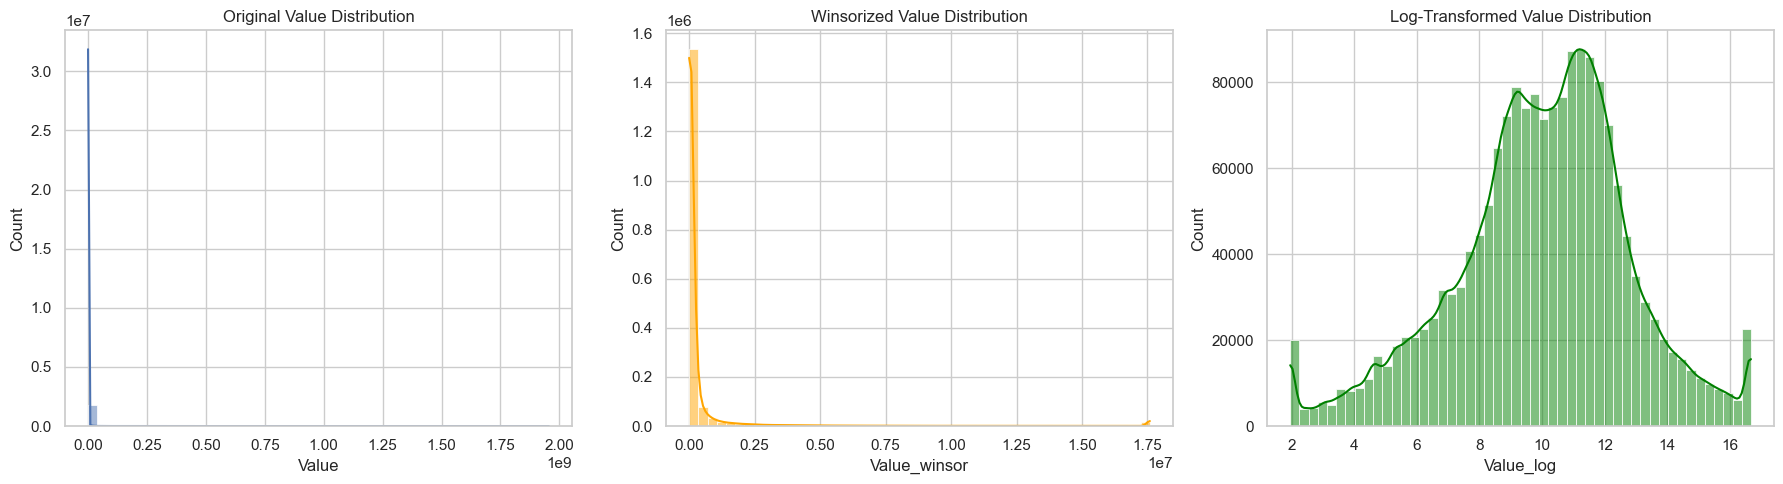

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["Value"], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Original Value Distribution")

sns.histplot(df["Value_winsor"], bins=50, ax=axes[1], kde=True, color="orange")
axes[1].set_title("Winsorized Value Distribution")

sns.histplot(df["Value_log"], bins=50, ax=axes[2], kde=True, color="green")
axes[2].set_title("Log-Transformed Value Distribution")

plt.tight_layout()
plt.show()

Element Breakdown Over Time

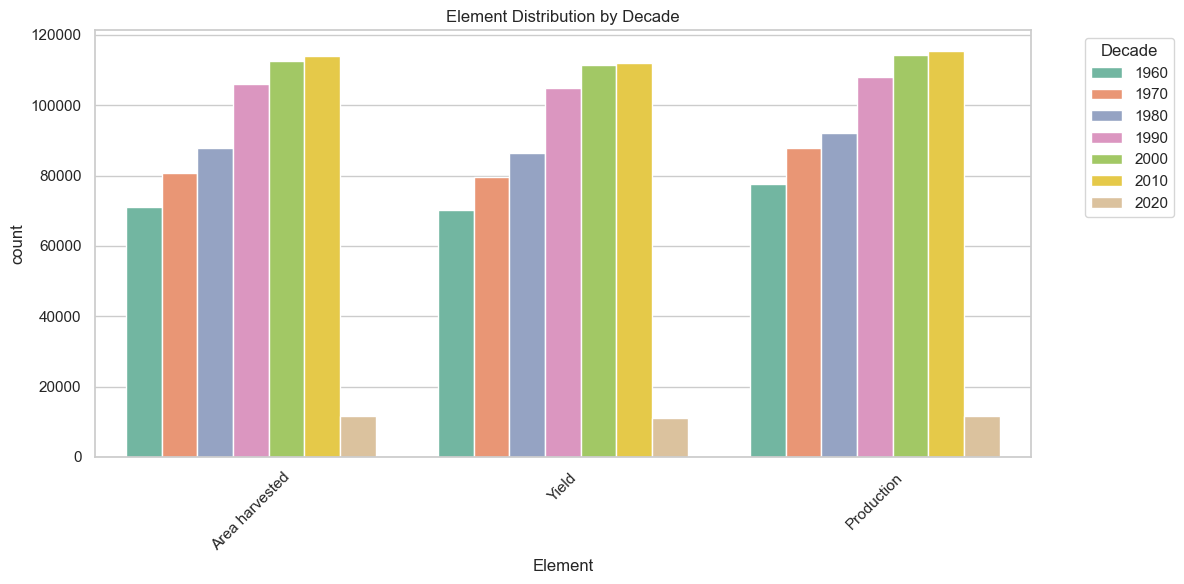

In [7]:
sns.countplot(data=df, x="Element", hue="Decade", palette="Set2")
plt.title("Element Distribution by Decade")
plt.xticks(rotation=45)
plt.legend(title="Decade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Top 10 Items by Frequency

C:\Users\User\AppData\Local\Temp\ipykernel_6208\605586097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_items.index, x=top_items.values, palette="viridis")


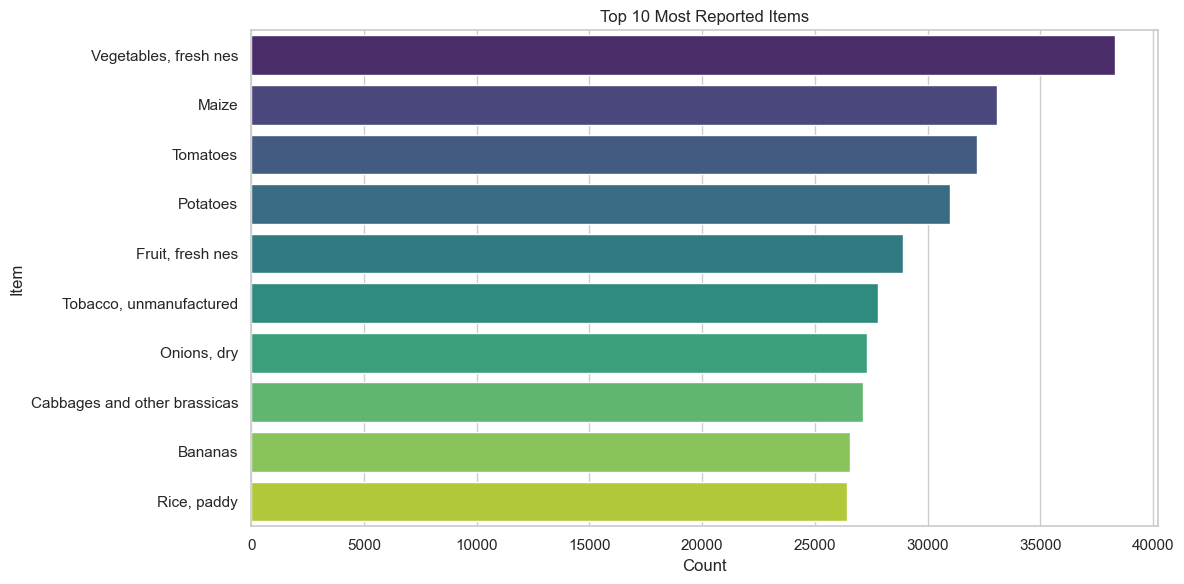

In [8]:
top_items = df["Item"].value_counts().head(10)

sns.barplot(y=top_items.index, x=top_items.values, palette="viridis")
plt.title("Top 10 Most Reported Items")
plt.xlabel("Count")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

Boxplots of Value by Element

C:\Users\User\AppData\Local\Temp\ipykernel_6208\4244561237.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Element", y="Value_log", palette="pastel")


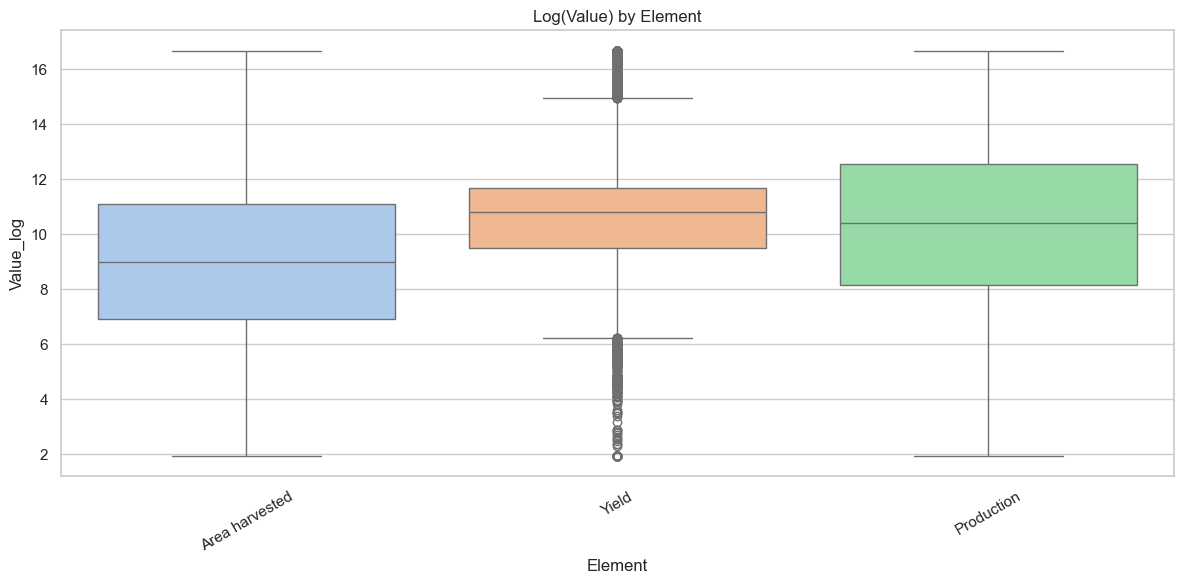

In [9]:
sns.boxplot(data=df, x="Element", y="Value_log", palette="pastel")
plt.title("Log(Value) by Element")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Heatmap: Correlation of Elements

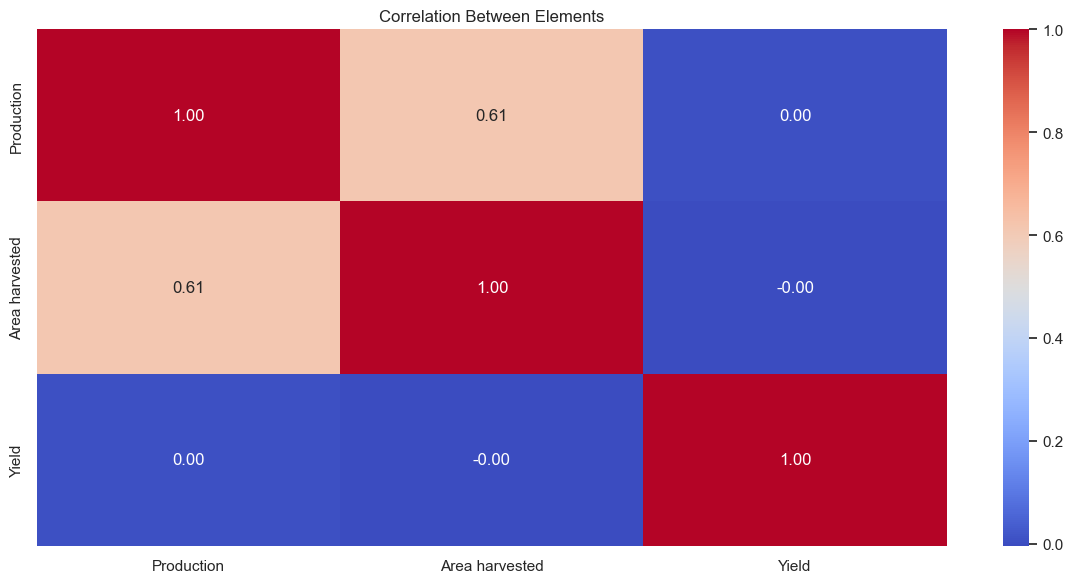

In [10]:
pivot_df = pd.read_csv("../data/processed/crop_data_pivot.csv")

corr = pivot_df[["Production", "Area harvested", "Yield"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Elements")
plt.tight_layout()
plt.show()

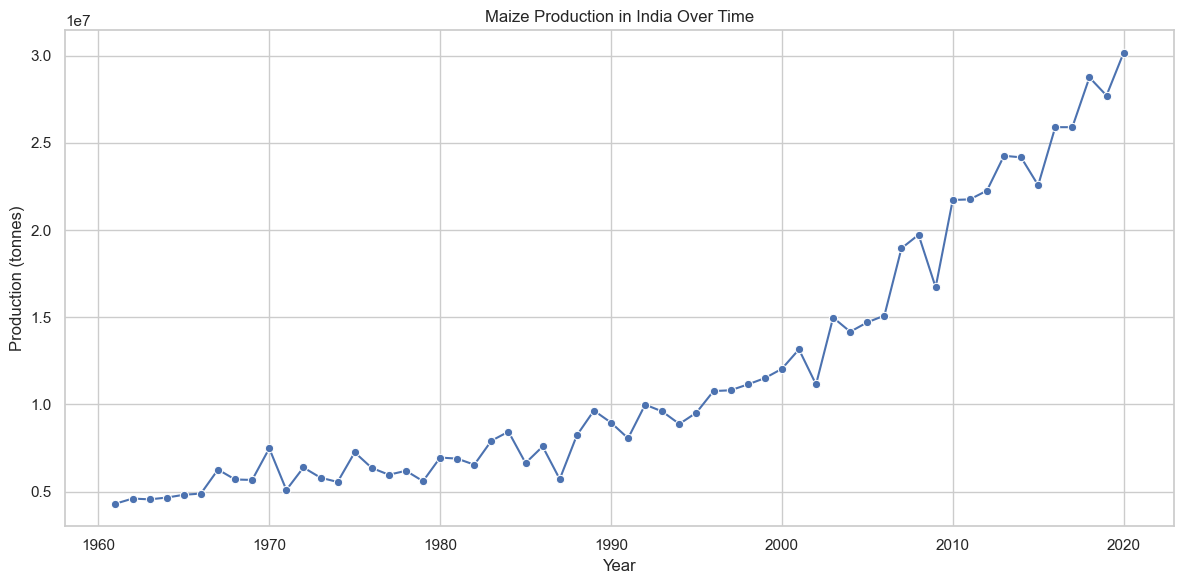

In [11]:
# Example: Production trend of Maize in India
mask = (df["Area"] == "India") & (df["Item"] == "Maize") & (df["Element"] == "Production")

df_plot = df[mask].sort_values("Year")

sns.lineplot(data=df_plot, x="Year", y="Value", marker="o")
plt.title("Maize Production in India Over Time")
plt.ylabel("Production (tonnes)")
plt.tight_layout()
plt.show()

In [12]:
fig = px.line(
    df_plot,
    x="Year",
    y="Value",
    title="Maize Production in India (Interactive)",
    labels={"Value": "Tonnes"},
    template="plotly_dark"
)
fig.show()

Element
Production        607118
Area harvested    583627
Yield             575730
Name: count, dtype: int64


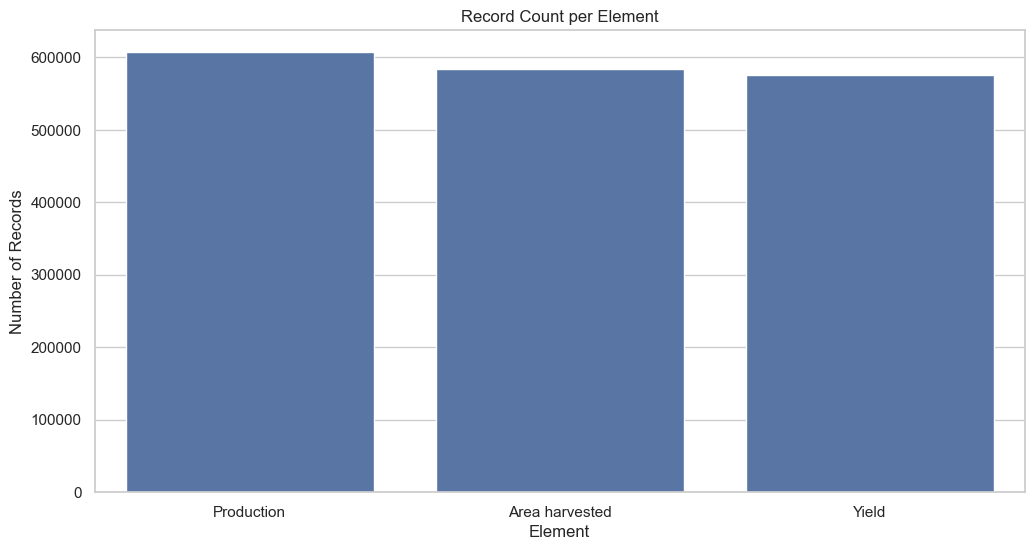

In [13]:
element_counts = df["Element"].value_counts()
print(element_counts)

# Optional: visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=element_counts.index, y=element_counts.values)
plt.title("Record Count per Element")
plt.ylabel("Number of Records")
plt.xlabel("Element")
plt.show()
